In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
poisson1 = stats.poisson.rvs(mu=55, size=200000)
poisson2 = stats.poisson.rvs(mu=10, size=100000)
population = np.concatenate((poisson1, poisson2))


In [3]:
population.mean()

39.9889

In [4]:
sample= np.random.choice(population, size=1000)

In [5]:
sample_mean = sample.mean()
sample_mean

41.169

In [6]:
data = (['red']*50000) + (['blue']*30000) + (['green']*10000) + (['white']*10000) 

In [7]:
set(data)

{'blue', 'green', 'red', 'white'}

In [8]:
sample = random.sample(data, 1000)  
for color in set(sample):
    print( color + " proportion estimate:" )
    print( sample.count(color)/1000 )

white proportion estimate:
0.101
blue proportion estimate:
0.282
red proportion estimate:
0.499
green proportion estimate:
0.118


In [9]:
z = stats.norm.ppf(q = 0.975)
z

1.959963984540054

In [10]:
pop_std =population.std()
pop_std

22.12542949014399

In [11]:
margin_of_error = z * (pop_std / np.sqrt(1000))
margin_of_error

1.3713231285596095

In [13]:
confidence_interval = (sample_mean - margin_of_error,  sample_mean + margin_of_error) 
confidence_interval

(39.79767687144039, 42.540323128559606)

In [20]:
intervals = []
sample_means = []

for sample in range(10):
    sample = np.random.choice(population, size = 1000)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    pop_std = population.std()  
    margin_of_error = z * (pop_std/np.sqrt(1000))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  
    intervals.append(confidence_interval)


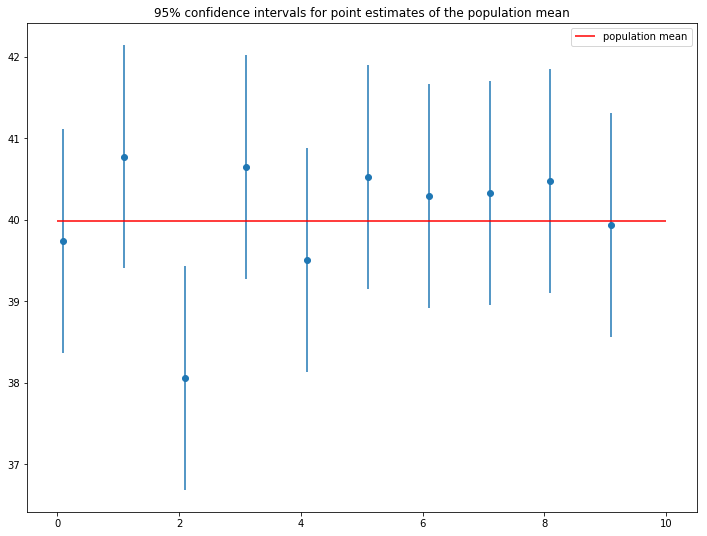

In [21]:
plt.figure(figsize=(12,9))

plt.errorbar(x=np.arange(0.1, 10, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=10, y=population.mean(),color="red", label='population mean')
plt.legend()
plt.title('95% confidence intervals for point estimates of the population mean')
plt.show()

In [30]:
sample_small = np.random.choice(population, size=10)  
sample_small_mean = sample_small.mean()
sample_small_mean

38.2

In [31]:
t = stats.t.ppf(q = 0.975, df=9)
t

2.2621571627409915

In [32]:
sigma = sample_small.std() / np.sqrt(10)
margin_of_error = t * sigma
confidence_interval = (sample_small_mean - margin_of_error,  sample_small_mean + margin_of_error)  
confidence_interval

(22.007631357247675, 54.39236864275233)

In [33]:
stats.t.ppf(q=0.975, df= 9) - stats.norm.ppf(0.975)  

0.3021931782009375

In [34]:
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)  

0.0023774765933946007

In [35]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 9,                     # Degrees of freedom
                 loc = sample_small_mean,   # Sample mean
                 scale = sigma)  

(22.007631357247675, 54.39236864275233)

In [36]:
for confidence in (.5, .75, .8, .90, .95):
    confidence_interval = stats.t.interval(alpha = confidence, df= 9, loc = sample_small_mean, scale = sigma)                   
    interval = round(confidence_interval[1] - confidence_interval[0], 2)
    print(confidence, interval)

0.5 10.06
0.75 17.6
0.8 19.8
0.9 26.24
0.95 32.38
